# Ensemble Learning

1. Can we use Bagging for regression problems?
   - Yes, Bagging can be used for regression. In Bagging Regressor, multiple regression models are trained on different bootstrap samples and their predictions are averaged to give the final output.

2. What is the difference between multiple model training and single model training?
   - Single model training uses one model to make predictions, while multiple model training uses many models and combines their results to get better performance and stability.

3. Explain the concept of feature randomness in Random Forest.
   - In Random Forest, at each split only a random subset of features is considered. This increases diversity among trees and reduces correlation between them.

4. What is OOB (Out-of-Bag) Score?
   - OOB score is an internal accuracy estimate in Bagging and Random Forest. It uses the data samples that were not included in training a particular tree to test it.

5. How can you measure the importance of features in a Random Forest model?
   - Feature importance is measured by how much each feature reduces impurity or improves prediction accuracy across all trees.

6. Explain the working principle of a Bagging Classifier.
   - A Bagging Classifier trains many classifiers on random bootstrap samples and combines their predictions using majority voting.

7. How do you evaluate a Bagging Classifier’s performance?
   - It is evaluated using metrics like accuracy, precision, recall, F1-score, confusion matrix, or OOB score.

8. How does a Bagging Regressor work?
   - It trains multiple regression models on different bootstrap samples and averages their predictions to produce the final result.

9. What is the main advantage of ensemble techniques?
   - They improve accuracy, reduce variance, and make models more robust compared to a single model.

10. What is the main challenge of ensemble methods?
    - They are computationally expensive and harder to interpret than single models.

11. Explain the key idea behind ensemble techniques.
    - The main idea is to combine multiple weak or base models to create a stronger and more accurate model.

12. What is a Random Forest Classifier?
    - It is an ensemble model that builds many decision trees using bagging and feature randomness, and predicts using majority voting.

13. What are the main types of ensemble techniques?
    - Bagging, Boosting, and Stacking are the main types of ensemble techniques.

14. What is ensemble learning in machine learning?
    - Ensemble learning is a technique where multiple models are combined to solve the same problem for better performance.

15. When should we avoid using ensemble methods?
    - When the dataset is very small, interpretability is important, or computational resources are limited.

16. How does Bagging help in reducing overfitting?
    - Bagging reduces overfitting by averaging multiple models trained on different data samples, which lowers variance.

17. Why is Random Forest better than a single Decision Tree?
    - Random Forest reduces overfitting, improves accuracy, and is more stable than a single decision tree.

18. What is the role of bootstrap sampling in Bagging?
    - Bootstrap sampling creates multiple different training datasets by sampling with replacement, helping to train diverse models.

19. What are some real-world applications of ensemble techniques?
    - Fraud detection, spam classification, medical diagnosis, stock prediction, and recommendation systems.

20. What is the difference between Bagging and Boosting?
    - Bagging trains models independently to reduce variance, while Boosting trains models sequentially to reduce bias by focusing on previous errors.

In [1]:
#21 Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9590643274853801


In [2]:
#22 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.25787382250585034


In [3]:
#23 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

print(model.feature_importances_)


[0.03484323 0.01522515 0.06799034 0.06046164 0.00795845 0.01159704
 0.06691736 0.10704566 0.00342279 0.00261508 0.0142637  0.00374427
 0.01008506 0.02955283 0.00472157 0.00561183 0.00581969 0.00375975
 0.00354597 0.00594233 0.08284828 0.01748526 0.0808497  0.13935694
 0.01223202 0.01986386 0.03733871 0.13222509 0.00817908 0.00449731]


In [4]:
#24 Train a Random Forest Regressor and compare its performance with a single Decision Tree.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=100)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Decision Tree MSE:", mean_squared_error(y_test, dt.predict(X_test)))
print("Random Forest MSE:", mean_squared_error(y_test, rf.predict(X_test)))


Decision Tree MSE: 0.533073872885465
Random Forest MSE: 0.2544048110118682


In [5]:
#25 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)

model = RandomForestClassifier(
    n_estimators=200,
    oob_score=True,
    bootstrap=True,
    random_state=42
)
model.fit(X, y)

print("OOB Score:", model.oob_score_)


OOB Score: 0.9595782073813708


In [6]:
#26 Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BaggingClassifier(
    estimator=SVC(kernel="linear"),
    n_estimators=10,
    random_state=42
)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.9590643274853801


In [7]:
#27 Train a Random Forest Classifier with different numbers of trees and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in [10, 50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(n, acc)


10 0.9649122807017544
50 0.9707602339181286
100 0.9707602339181286
200 0.9707602339181286


In [10]:
#28 Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=5000))
])

model = BaggingClassifier(
    estimator=base_model,
    n_estimators=20,
    random_state=42
)

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]
print("AUC Score:", roc_auc_score(y_test, y_prob))


AUC Score: 0.9979423868312757


In [1]:
#29 Train a Random Forest Regressor and analyze feature importance scores.

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

X, y = fetch_california_housing(return_X_y=True)

model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

print(model.feature_importances_)


[0.51991179 0.05303644 0.04484503 0.02899275 0.03176876 0.13584102
 0.09291271 0.09269149]


In [12]:
#30 Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
rf = RandomForestClassifier(n_estimators=100)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Bagging:", accuracy_score(y_test, bag.predict(X_test)))
print("Random Forest:", accuracy_score(y_test, rf.predict(X_test)))


Bagging: 0.9590643274853801
Random Forest: 0.9649122807017544


In [13]:
#31 Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9604395604395604


In [3]:
#32 Train a Bagging Regressor with different numbers of base estimators and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for n in [10, 50, 100]:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Estimators={n}, R2 Score={r2_score(y_test, y_pred):.3f}")



Estimators=10, R2 Score=0.772
Estimators=50, R2 Score=0.792
Estimators=100, R2 Score=0.795


In [4]:
#33 Train a Random Forest Classifier and analyze misclassified samples.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

misclassified_indices = np.where(y_pred != y_test)[0]

print("Total test samples:", len(y_test))
print("Misclassified samples:", len(misclassified_indices))
print("First 10 misclassified indices:", misclassified_indices[:10])

for i in misclassified_indices[:5]:
    print(f"Index {i} | Actual: {y_test[i]} | Predicted: {y_pred[i]}")


Total test samples: 114
Misclassified samples: 4
First 10 misclassified indices: [ 8 20 77 82]
Index 8 | Actual: 1 | Predicted: 0
Index 20 | Actual: 0 | Predicted: 1
Index 77 | Actual: 0 | Predicted: 1
Index 82 | Actual: 0 | Predicted: 1


In [2]:
#34 Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

def evaluate(y_true, y_pred, model_name):
    print(f"Performance of {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))

evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_bag, "Bagging Classifier")



Performance of Decision Tree:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1-score: 0.9577464788732394
Performance of Bagging Classifier:
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-score: 0.965034965034965


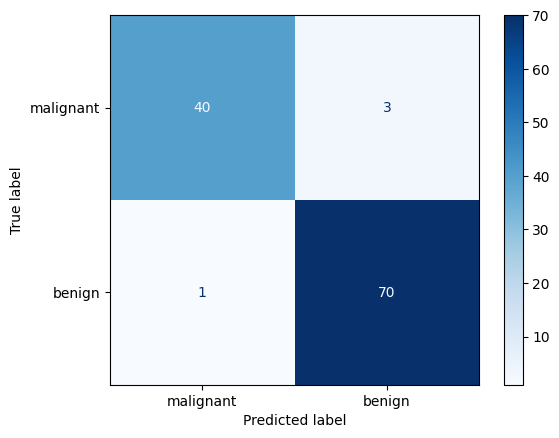

In [13]:
#35 Train a Random Forest Classifier and visualize the confusion matrix.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues", values_format='d')



In [23]:
#36 Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(probability=True, random_state=42))
    ])),
    ('lr', Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=3000))
    ]))
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=3000),
    cv=5
)

stack.fit(X_train, y_train)

y_pred = stack.predict(X_test)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred))



Stacking Accuracy: 0.9736842105263158


In [2]:
#37 Train a Random Forest Classifier and print the top 5 most important features.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

data = load_breast_cancer()

X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

importances = rf.feature_importances_

top_5_indices = np.argsort(importances)[-5:][::-1]

for idx in top_5_indices:
    print(feature_names[idx], importances[idx])



worst area 0.12854936103010545
worst concave points 0.12834295101973656
worst perimeter 0.12707932692533336
mean concave points 0.11980109476499812
worst radius 0.069273128231601


In [3]:
#38 Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

base_model = DecisionTreeClassifier(random_state=42)

bagging_clf = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,
    random_state=42
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-score: 0.965034965034965


In [4]:
#39 Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

depths = [None, 2, 4, 6, 8, 10, 15, 20]
accuracies = []

for depth in depths:
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=depth,
        random_state=42
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print("max_depth =", depth, "-> Accuracy =", acc)



max_depth = None -> Accuracy = 0.9649122807017544
max_depth = 2 -> Accuracy = 0.9649122807017544
max_depth = 4 -> Accuracy = 0.9649122807017544
max_depth = 6 -> Accuracy = 0.9649122807017544
max_depth = 8 -> Accuracy = 0.9649122807017544
max_depth = 10 -> Accuracy = 0.9649122807017544
max_depth = 15 -> Accuracy = 0.9649122807017544
max_depth = 20 -> Accuracy = 0.9649122807017544


In [5]:
#40 Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

data = fetch_california_housing()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_base = DecisionTreeRegressor(random_state=42)
knn_base = KNeighborsRegressor()

bagging_dt = BaggingRegressor(
    estimator=dt_base,
    n_estimators=100,
    random_state=42
)

bagging_knn = BaggingRegressor(
    estimator=knn_base,
    n_estimators=100,
    random_state=42
)

bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

dt_pred = bagging_dt.predict(X_test)
knn_pred = bagging_knn.predict(X_test)

dt_r2 = r2_score(y_test, dt_pred)
knn_r2 = r2_score(y_test, knn_pred)

dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))

print("Bagging + Decision Tree")
print("R2 Score:", dt_r2)
print("RMSE:", dt_rmse)

print()

print("Bagging + KNN")
print("R2 Score:", knn_r2)
print("RMSE:", knn_rmse)



Bagging + Decision Tree
R2 Score: 0.8046988456668309
RMSE: 0.5058896975616288

Bagging + KNN
R2 Score: 0.1786384574554135
RMSE: 1.0374582110775454


In [7]:
#41 Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_prob = rf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc_auc)



ROC-AUC Score: 0.9959056665574844


In [6]:
#42 Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

data = load_breast_cancer()

X = data.data
y = data.target

base_model = DecisionTreeClassifier(random_state=42)

bagging_clf = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(
    bagging_clf,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

print("Cross-validation accuracy scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))



Cross-validation accuracy scores: [0.89473684 0.93859649 0.99122807 0.96491228 1.        ]
Mean accuracy: 0.9578947368421054
Standard deviation: 0.03819568606504778


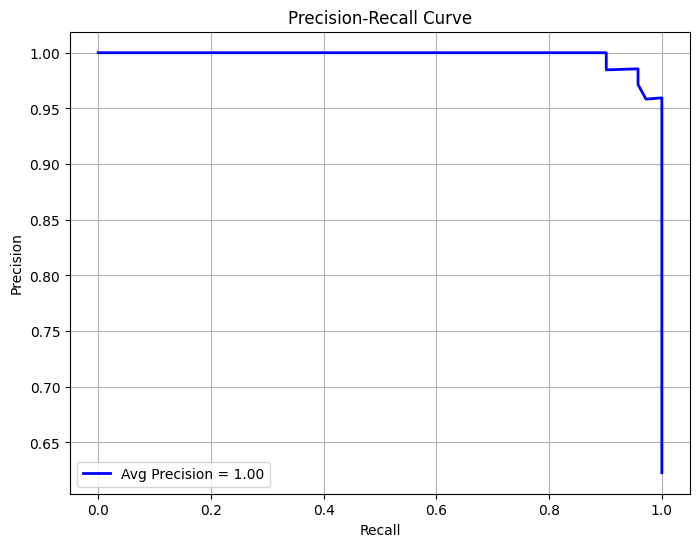

In [8]:
#43 Train a Random Forest Classifier and plot the Precision-Recall curve.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_prob = rf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='b', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()



In [11]:
#44 Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=200, random_state=42)

lr_scaled = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000, random_state=42)
)

stack_clf = StackingClassifier(
    estimators=[('rf', rf), ('lr', lr_scaled)],
    final_estimator=LogisticRegression(max_iter=5000, random_state=42),
    cv=5
)

stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)
stack_accuracy = accuracy_score(y_test, y_pred_stack)

print("Stacking Classifier Accuracy:", stack_accuracy)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

lr_scaled.fit(X_train, y_train)
y_pred_lr = lr_scaled.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))



Stacking Classifier Accuracy: 0.9736842105263158
Random Forest Accuracy: 0.9649122807017544
Logistic Regression Accuracy: 0.9736842105263158


In [12]:
#45 Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

base_model = DecisionTreeRegressor(random_state=42)

bootstrap_sizes = [0.5, 0.7, 1.0]

for bs in bootstrap_sizes:
    bagging = BaggingRegressor(
        estimator=base_model,
        n_estimators=100,
        max_samples=bs,
        bootstrap=True,
        random_state=42
    )

    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Bootstrap fraction = {bs}")
    print(f"R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")


Bootstrap fraction = 0.5
R2 Score: 0.7985, RMSE: 0.5139
Bootstrap fraction = 0.7
R2 Score: 0.8024, RMSE: 0.5089
Bootstrap fraction = 1.0
R2 Score: 0.8047, RMSE: 0.5059
